## Problem Statement:<br>
 Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [69]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
from numpy import sqrt
import plotly.express as px
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [70]:
#reading csv file using pandas
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True)

## Performing EDA

In [71]:
#displaying  first 5 records 
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [72]:
#displaying last 5 records
data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [73]:
#shape of dataset
data.shape  

(42, 2)

Dataset has `42` rows and `2` columns

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [75]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


#### The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [76]:
data.ndim

2

In [77]:
data.axes

[RangeIndex(start=0, stop=42, step=1),
 Index(['Quarter', 'Sales'], dtype='object')]

In [78]:
data.columns

Index(['Quarter', 'Sales'], dtype='object')

In [79]:
#Checking for missing data
data.isna().sum()

Quarter    0
Sales      0
dtype: int64

#### Dataset has no any NA values

In [80]:
#checking for duplication of data
data[data.duplicated()].shape

(0, 2)

#### There is no any duplicate values in the dataset

In [11]:
data.nunique()

Quarter    42
Sales      42
dtype: int64

In [12]:
data.Quarter.unique()

array(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87',
       'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89',
       'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91',
       'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92',
       'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94',
       'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
      dtype=object)

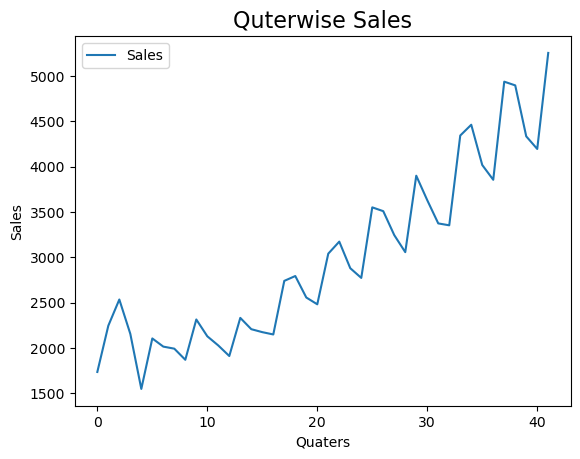

In [13]:
data.plot()
plt.title('Quterwise Sales',fontdict={'fontsize': 16,'color': 'black'})
plt.xlabel('Quaters')
plt.ylabel('Sales')
plt.show()

<h3>Observations:</h3>
The graph shows the data has Trend as well as multiplicative seasonality <br>
There is an upward trend in the sales as the number of Quters increases<br>
at some intervals' the peak is getting up and down which know as seasonality <br>

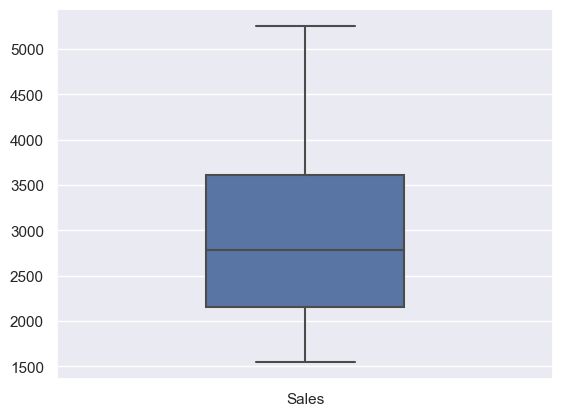

In [84]:
#checking for outleries
sns.boxplot(data =data,width=0.4)
plt.show()

<h3>Observations:</h3>
The sales has Mean: 2994 <br>
There is no any outlier has been detected<br>
IQR is between 2150 to 3609

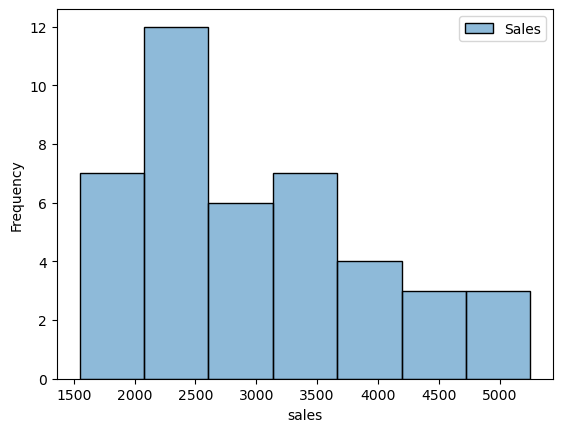

In [15]:
#histogram for sales
sns.histplot(data)
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.show()

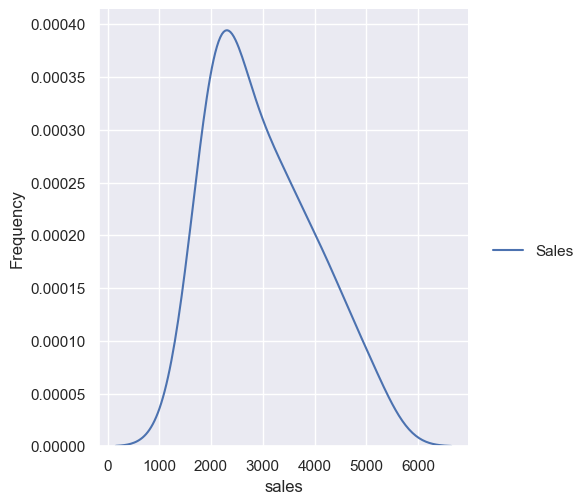

In [85]:
#hdisplot for sales
sns.displot(data, kind="kde")
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.show()

<h3>Observations:</h3>
There is an showing nearly Normal distribution in graph<br>
sales between 1000 to 5000 the variance is high <br>
At sales value 2300 the frequency is high

In [17]:
np.array(data["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

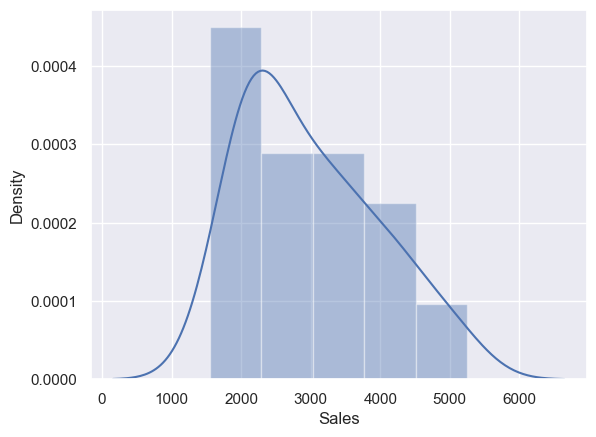

In [18]:
sns.set_theme()
rk= sns.distplot(data['Sales'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

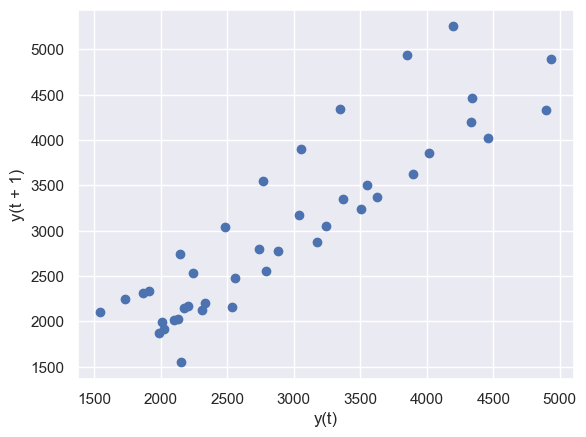

In [19]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])

<h3>Observations:</h3>
The lag_plot graph shows the time series is random <br>

In [22]:
len(data)

42

In [23]:
data['quarter'] = 0
for i in range(42):
    p=data['Quarter'][i]
    data['quarter'][i]=p[0:2]

In [24]:
data.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [25]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [26]:
df_dummies=pd.DataFrame(pd.get_dummies(data['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([data,df_dummies],axis= 1)

In [27]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [28]:
#adding columns t,t_squared and sales_log
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(data['Sales'])

In [29]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


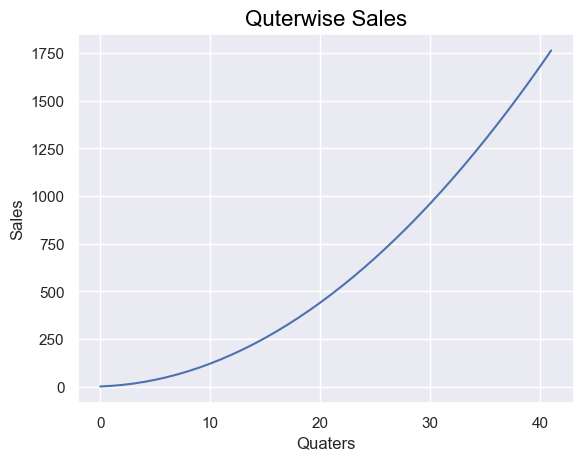

In [81]:
cc['t_squared'].plot()
plt.title('Quterwise Sales',fontdict={'fontsize': 16,'color': 'black'})
plt.xlabel('Quaters')
plt.ylabel('Sales')
plt.show()

<h3>Observations:</h3>
as we saw in first there was an trend and multiplicative seasonality <br>
now we have defined new column t_squared and plotted the graph<br>
so there we got the upward trend but the seasonality has reduced<br>

<AxesSubplot:xlabel='quarter'>

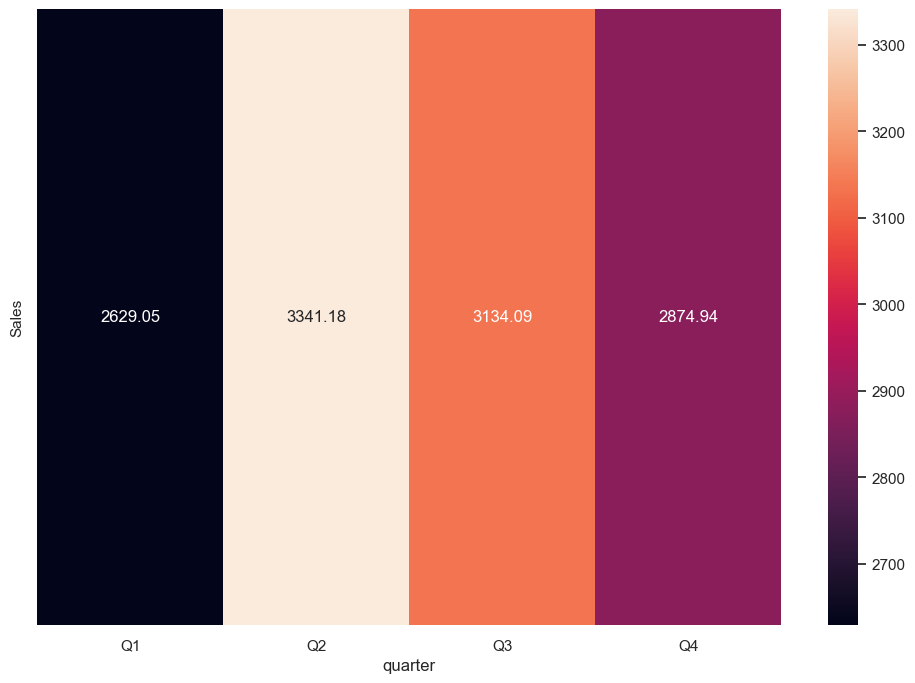

In [30]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<h3>Observations:</h3>
The Quarter 2 has highest mean<br>
Most of the Sales has occurred in Quarter 2.So, these quarter is benificial for oue future analysis <br> 
while Quarter 1 has low mean<br>
which means less sales took place in Quarter 1

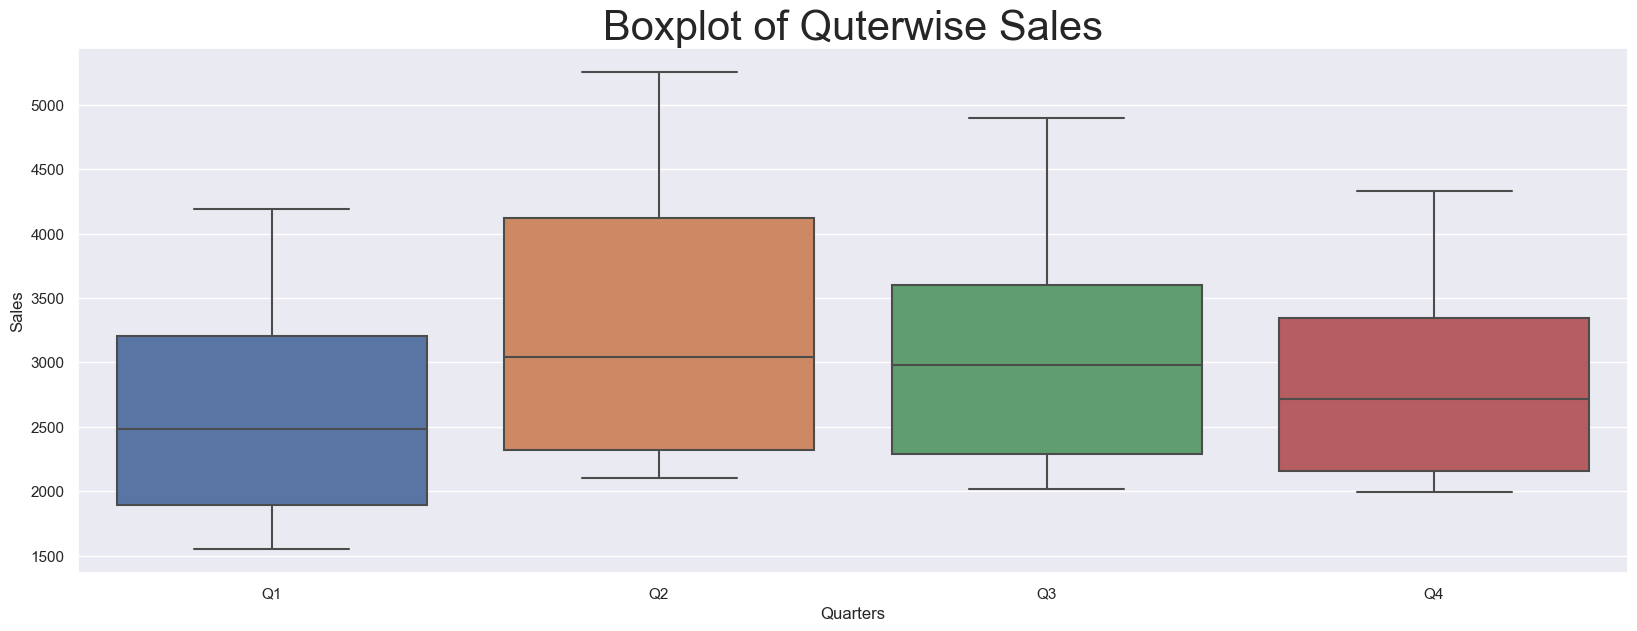

In [31]:
# Boxplot for ever
plt.figure(figsize=(20,15))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=data)
plt.title('Boxplot of Quterwise Sales',fontdict={'fontsize': 30})
plt.xlabel('Quarters')
plt.show()

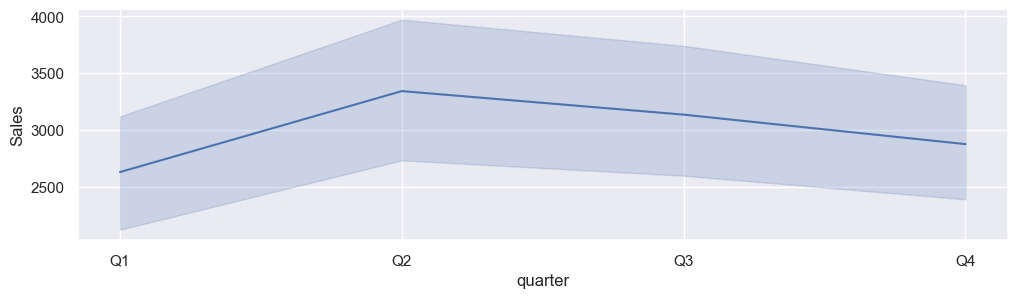

In [32]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=data)
plt.show()

<h3>Observations:</h3>
From Quarter 1 the sales was in upward trend<br>
then from Quarter 2 the sales got drastic downward<br>

## Splitting of data

In [33]:
train =cc.head(32)
test =cc.tail(10)

## Moving Average

A moving average is a technique that calculates the overall trend in a data set. In operations management, the data set is sales volume from historical data of the company. This technique is very useful for forecasting short-term trends. It is simply the average of a select set of time periods

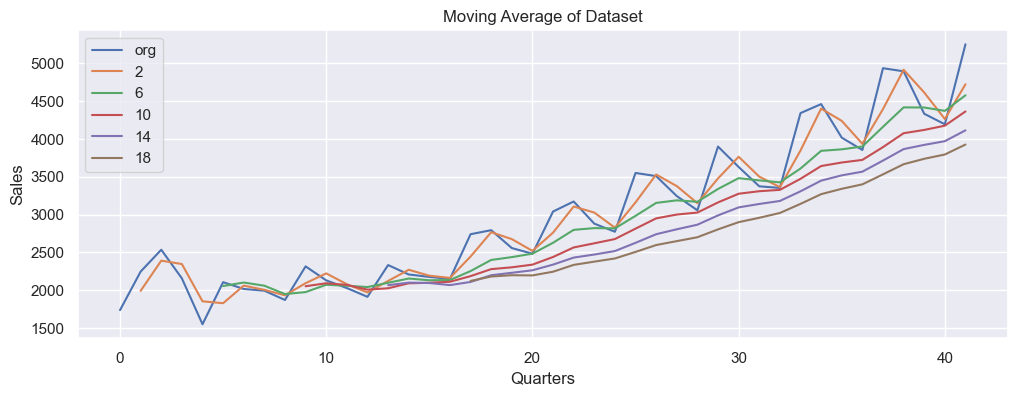

In [86]:
plt.figure(figsize=(12,4))
data['Sales'].plot(label="org")
for i in range(2,20,4):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.title('Moving Average of Dataset')
plt.xlabel('Quarters')
plt.ylabel('Sales')
plt.show()

<h3>Observations:</h3>
The original sales according to quarters have trend and seasonality<br>
but as we increase the number range the seasonality getting vanished<br>
and at the end the best fitted line getting which fits maximum numbers od data points on a line

## Time series decomposition plot 

Time series decomposition is usually presented as an analysis step to be performed before generating predictions, but it can also be used as a forecasting method in and of itself if you know what the structure of your time series will look like beforehand

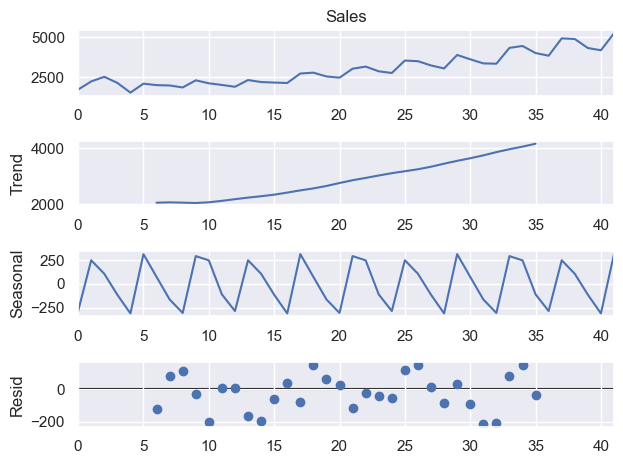

In [35]:
decompose_ts_add = seasonal_decompose(data['Sales'],period=12)
decompose_ts_add.plot()
plt.show()

<h3>Observations:</h3>
By seasonal_decompose we have got the forecasting components<br>
In trend component we got Upward trend<br>
In seasonal component we got additive seasonality <br>
And Resid part covers less numbers of datapoints on the line

## ACF plots and PACF plots

An ACF measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lengths. A PACF is similar to an ACF except that each partial correlation controls for any correlation between observations of a shorter lag length

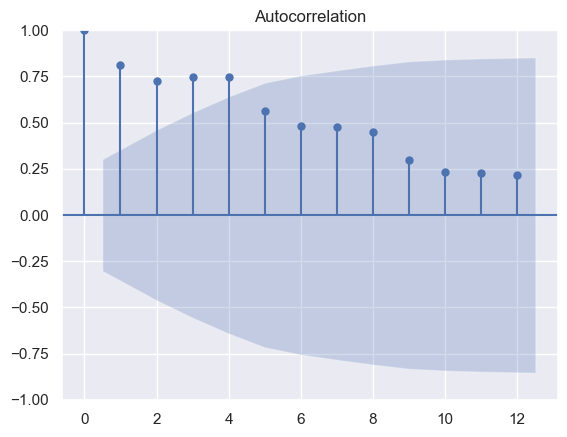

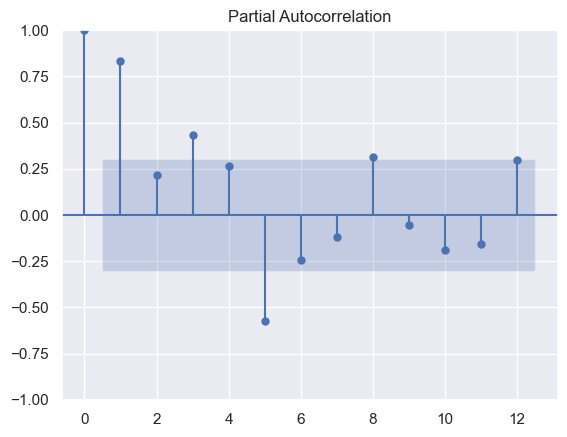

In [36]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data['Sales'],lags=12)
tsa_plots.plot_pacf(data['Sales'],lags=12)
plt.show()

<h3>Observations:</h3>
The autocorrelation graph shows that lags getting gradually decresing<br>
so we can see that data is non-Stationary<br>
In ACF there are four significant spikes <br>
In PACF there are five significant spikes

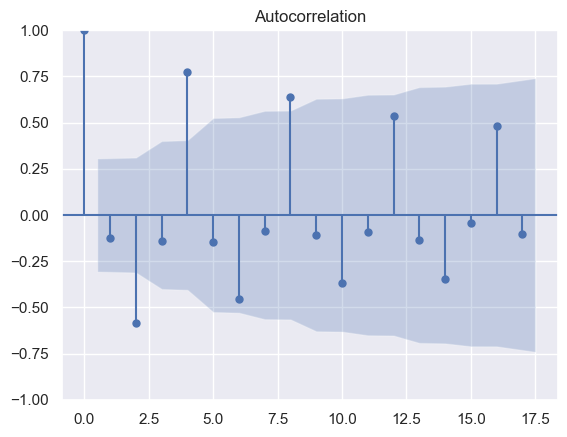

In [37]:
sales_diff = data['Sales'].diff(periods = 1)
tsa_plots.plot_acf(sales_diff[1:])
plt.show()

<h3>Observations:</h3>
The data has been converted into Stationary<br>
In ACF there are only three significant spikes <br>

## Evaluation Metric MAPE

In [38]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [43]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales)

22.724051812293908

### Holt method 

In [44]:
# Holt method 
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

16.720651186614823

### Holts winter exponential smoothing with additive seasonality and additive trend

In [45]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

12.18419752082701

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [46]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

12.781002162867637

## Final Model by combining train and test

In [49]:
hwe_model_add_add = ExponentialSmoothing(data["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [50]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(12)

42    5055.537501
43    4927.723652
44    4883.395386
45    5555.315269
46    5589.336941
47    5335.210947
48    5233.944437
49    5969.869343
50    6031.388558
51    5756.189471
52    5561.316463
53    6362.887311
dtype: float64

## Buliding Models

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
# Linear Model

linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767121

In [53]:
#Quadratic Model

quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.7357355407437

In [54]:
# Exponential model

exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [55]:
#Additive seasonality model

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

In [56]:
#Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128639

In [57]:
##Multiplicative Seasonality model

Mul_sea = smf.ols('Sales_log~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836118

In [58]:
#Multiplicative Additive Seasonality model

Mul_Add_sea = smf.ols('Sales_log~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.8678182692097

In [59]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_Exp","rmse_add_sea","rmse_add_sea_quad",
                           "rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([linear_rmse,quad_rmse,exp_rmse,rmse_add_sea,
                                 rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
1,rmse_Quad,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395
2,rmse_Exp,4387.940545


## ARIMA model

In [60]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)

In [61]:
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [62]:
#separate out a validation dataset
split_point = len(data) - 10
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 32, Validation_cc 10


In [63]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [64]:
from pandas import read_csv
from math import sqrt

In [65]:
train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train.head()

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: 1, dtype: float64

In [66]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

## Validation

In [67]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
RMSE: 387.510


In [68]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_Exp","rmse_add_sea","rmse_add_sea_quad",
                           "rmse_Mult_sea","rmse_Mult_add_sea","RMSE_ARIMA"]),
        "RMSE_Values":pd.Series([linear_rmse,quad_rmse,exp_rmse,rmse_add_sea,
                                 rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
7,RMSE_ARIMA,387.510403
6,rmse_Mult_add_sea,448.867818
1,rmse_Quad,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395
2,rmse_Exp,4387.940545


<h3>Insights:</h3>
    The least RMSE values has the rmse_add_sea_quad (Additive Seasonality Quadratic) model and we can final this model and forecast the future predictions.